<div align=center>
		
<p></p>
<p></p>
<font size=5>
In the Name of God
<font/>
<p></p>
 <br/>
    <br/>
<font color=#4d7db8>
Sharif University of Technology - Department of Electrical Engineering
</font>
<p></p>
<font color=#4d7db8>
Introduction To Machine Learning - Dr. Sajjad Amini
</font>
<br/>
<br/>
Spring Semester 1401-02

<div/>

<hr/>
		<div align=center>
		    <font color=red size=6>
			    <br />
Project - 3rd Phase
<br />
Image Denoising using Autoencoder and PCA
			</font>
    <br/>
<font size=4>
			<br/><br/>
Due on Tir 10th
                <br/><b>
              Cheating is Strongly Prohibited
                </b><br/><br/>
                <font color=green>
Should you have any questions concerning the project, please feel free to ask via Telegram.
     </font>
</font>
                <br/>
    </div>

# Personal Info
<hr/>
    <div class="column" align=center>
    <font size=4>
        <div class="column">
        <br />
            student_number = 99109166
            <br />
            Name = Arman   
            <br />
            Last_Name = Lotfalikhani  
        </div>
        <div class="column">
        <br />
            student_number = 99106599
            <br />
            Name = Sepehr    
            <br />
            Last_Name = Kazemi Ranjbar
        </div>
    </font>
    </div>


1. Download the MNIST dataset and create a dataloader that adds gaussian noise to the input images.
2. Design and train an AutoEncoder on the MNIST dataset to denoise the noisy images.
3. Visualize original images, their corresponding noisy images and their reconstructed versions side by side.
4. Repeat the previous steps using PCA algorithm.

# Import Necessary Libraries

In [1]:
import torch
from torchvision.datasets import MNIST
from torchvision import transforms
from torch.utils.data import DataLoader

import numpy as np
from matplotlib import pyplot as plt
from typing import Dict

# Load Dataset and Prepare It

In [7]:
train_set = MNIST(root='.', train=True, download=True, transform=transforms.ToTensor())
test_set = MNIST(root='.', train=False, download=True, transform=transforms.ToTensor())
image_shape = train_set[0][0].shape
input_dim = np.prod(image_shape).item()
num_classes = len(MNIST.classes)
print(num_classes)

10


In [3]:
train_loader = DataLoader(train_set, 32, shuffle=True)
test_loader = DataLoader(test_set, 32, shuffle=True)

# Define Your Model
torch neural network model

In [25]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder=nn.Sequential(
            nn.Conv2d(1,30,kernel_size=4,stride=2),#40 times 13*13
            nn.ReLU(),
            nn.Conv2d(30,20,kernel_size=3,stride=2),#20 times 6*6
            nn.ReLU(),
            nn.Conv2d(20,40,kernel_size=6,stride=1)#40 parameters in the end
        )
        self.decoder=nn.Sequential(
            nn.ConvTranspose2d(40,20,6),#20 times 6*6
            nn.ReLU(),
            nn.ConvTranspose2d(20,30,kernel_size=3,stride=2),#30 times 6*6
            nn.ReLU(),
            nn.ConvTranspose2d(30,1,kernel_size=4,stride=2),#40 parameters in the end
            nn.Sigmoid()
        )
        ## FILL HERE

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded
net=Net()

# Fit The Model
Also Define optimizer, Criterion and other parameters 

In [26]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
loss_func=nn.MSELoss()
gpu_net=net.to(device)
optimizer=torch.optim.Adam(gpu_net.parameters())

train_sigma=0.5 
epoch_nums = 20## Number of epochs
for epoch in range(epoch_nums):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        images=data[0].to(device)
        my_classes=data[1].to(device)
        
        #print(images.size())
        noisy=images+train_sigma*torch.randn(images.size(),device=device)
        denoised=gpu_net(noisy)
        loss=loss_func(images,denoised)
        
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        
        running_loss=running_loss+loss.item()/len(train_loader)
    print("Epoch: %i Running loss: %f"%(epoch,running_loss))
        ## FILL HERE
        ## You should train the model and also print the running loss for each batch

print('Finished Training')

Epoch: 0 Running loss: 0.033000
Epoch: 1 Running loss: 0.014083
Epoch: 2 Running loss: 0.012587
Epoch: 3 Running loss: 0.011996
Epoch: 4 Running loss: 0.011657
Epoch: 5 Running loss: 0.011454
Epoch: 6 Running loss: 0.011288
Epoch: 7 Running loss: 0.011144
Epoch: 8 Running loss: 0.011037
Epoch: 9 Running loss: 0.010980
Epoch: 10 Running loss: 0.010894
Epoch: 11 Running loss: 0.010829
Epoch: 12 Running loss: 0.010769
Epoch: 13 Running loss: 0.010703
Epoch: 14 Running loss: 0.010663
Epoch: 15 Running loss: 0.010643
Epoch: 16 Running loss: 0.010605
Epoch: 17 Running loss: 0.010557
Epoch: 18 Running loss: 0.010527
Epoch: 19 Running loss: 0.010496
Finished Training


# Plot The Results

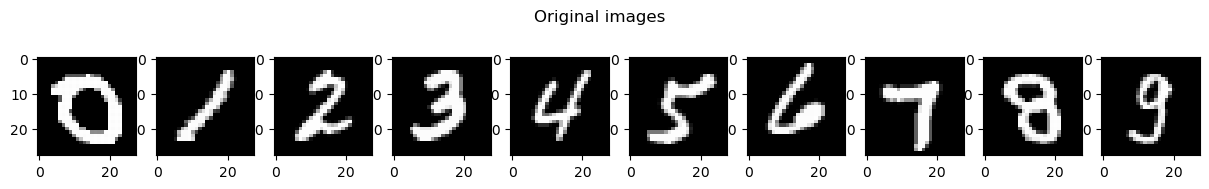

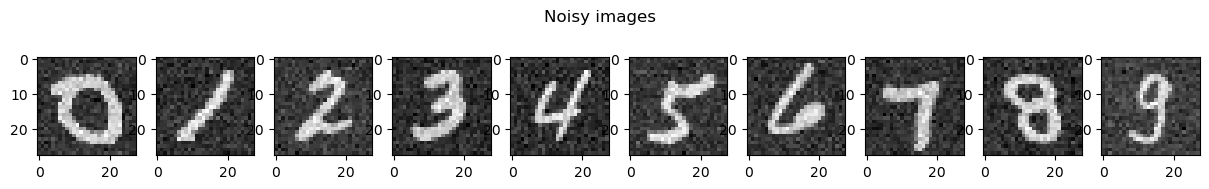

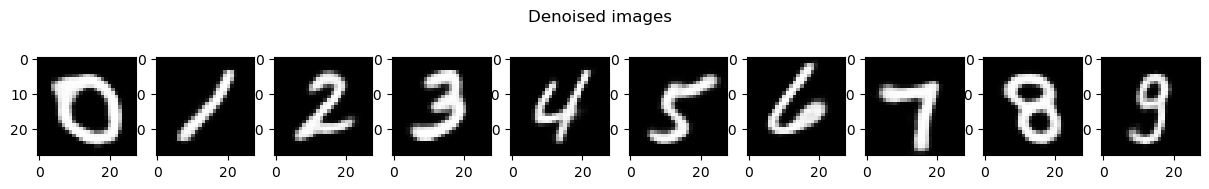

In [161]:
fig2,axs2=plt.subplots(1,10,figsize=(15,2))
fig6,axs6=plt.subplots(1,10,figsize=(15,2))
fig7,axs7=plt.subplots(1,10,figsize=(15,2))
rng=np.random.default_rng()
sigma=0.1#We have used this amount of noise for test, and it is lower than the training sigma (0.5)
for i in range(10):
    index = rng.integers(len(test_set))
    image, label = test_set[index]
    while (label!=i):
        index = rng.integers(len(test_set))
        image, label = test_set[index]
    image=image.to(device)
    noisy=image+sigma*torch.randn(image.size(),device=device)
    denoised=gpu_net(noisy)    
    axs2[i].imshow(image.cpu()[0], cmap="gray")
    axs6[i].imshow(noisy.cpu()[0], cmap="gray")
    axs7[i].imshow(denoised.cpu().detach().numpy()[0], cmap="gray")
fig2.suptitle('Original images')
fig6.suptitle('Noisy images')
fig7.suptitle('Denoised images')
plt.show()

# PCA

Here we use one example from each digit to get an approxiamtion on the best number of components to keep. Then we average over them and use the number to denoise on the test set

Best number of components: 6


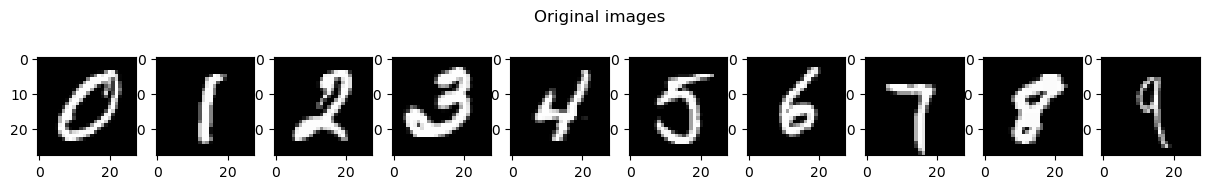

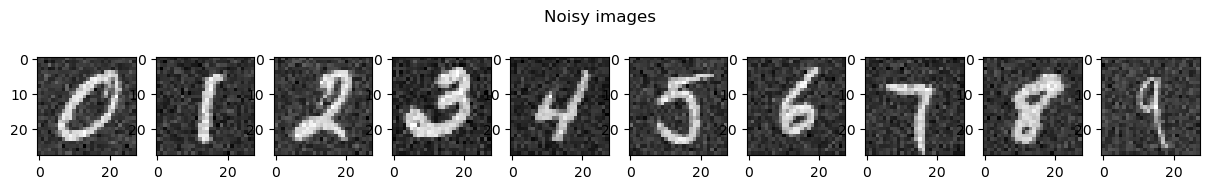

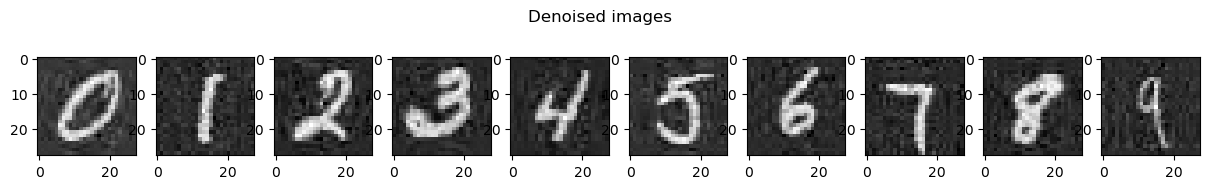

In [158]:
def svd_train(x,original):
    u,s,vh=np.linalg.svd(x,False)
    k=np.size(s)
    psnr=np.zeros([k])
    r_reconstruction=np.zeros(x.shape)
    for r in range(k):
        r_reconstruction=np.add(r_reconstruction,s[r]*np.outer(u[:,r],vh[r,:]))
        mse=np.mean(np.square(original-r_reconstruction))
        psnr[r]=10*np.log10(np.amax(r_reconstruction)**2/mse)
    best_r=np.argmax(psnr)
    return best_r

def svd_predict(x,best_r):
    u,s,vh=np.linalg.svd(x,False)
    final_image=u[:,:best_r+1]@np.diag(s[:best_r+1])@vh[:best_r+1,:]
    return final_image
 
fig3,axs3=plt.subplots(1,10,figsize=(15,2))
fig4,axs4=plt.subplots(1,10,figsize=(15,2))
fig5,axs5=plt.subplots(1,10,figsize=(15,2))
rng=np.random.default_rng()
sigma=0.1

best_rs=np.zeros(10)
#Training: here we estimate the best number of components
for i in range(10):
    index = rng.integers(len(train_set))
    image, label = train_set[index]
    while (label!=i):
        index = rng.integers(len(train_set))
        image, label = train_set[index]
    noisy=(image+sigma*torch.randn(image.size()))[0].numpy()
    best_rs[i]=svd_train(noisy,image[0].numpy())
best_r=int(np.round(np.mean(best_rs)+1))
print('Best number of components: %i' %best_r)
for i in range(10):
    index = rng.integers(len(train_set))
    image, label = train_set[index]
    while (label!=i):
        index = rng.integers(len(train_set))
        image, label = train_set[index]
    noisy=(image+sigma*torch.randn(image.size()))[0].numpy()
    denoised=svd_predict(noisy,best_r)
    axs3[i].imshow(image.cpu()[0], cmap="gray")
    axs4[i].imshow(noisy, cmap="gray")
    axs5[i].imshow(denoised, cmap="gray")
fig3.suptitle('Original images')
fig4.suptitle('Noisy images')
fig5.suptitle('Denoised images')
plt.show()

It is clear that the autoencoder is far superior than the pca method. Note that the noise std (sigma) is the same in visualizing  with both pca and autoencoder (sigma is 0.1)